## Ejercicios de pair programming del 21 de diciembre: Estadistica III

In [52]:
#importamos las librerias
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st
import pycountry_convert as pc

In [53]:
#Abrimos el archivo y borramos la columna "Unnamed: 0" que aparece cuando abrimos el documento
df = pd.read_csv("Datos/df_limpio.csv")
df.drop("Unnamed: 0", axis=1, inplace= True)

In [54]:
df.head(2)

,city,country,Meal,Meal for 2 People,McMeal,Domestic Beer Rest,Imported Beer Rest,Cappuccino,Coke/Pepsi,Water Rest,...,Business Shoes,1 bedroom Centre,1 bedroom Out,3 bedrooms Centre,3 bedrooms Out,Price Meter Centre,Price Meter Out,Average Monthly,Mortgage Interest,data_quality
0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1


1.Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

1.1. Tabla de contingencia

In [55]:
df_cont = pd.crosstab(df["country"], df["city"])   #las unicas variables cualitativas que podemos usar son city y country
df_cont.head()

city,'s-Hertogenbosch,A Coruna,Aachen,Aalborg,Aalen,Aalst,Aarau,Aarhus,Aarschot,Aba,...,Zurrieq,Zutphen,Zvolen,Zweibrucken,Zwickau,Zwolle,`Afrin,`Ajman,`Ataq,`Ibri
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Aparece un 1 cuando coincide la ciudad y el pais al que pertenece. Y un cero cuando no coinciden pais y ciudad. Como la tabla sale muy grande vamos a filtrar por continente

In [67]:
#Creamos una funcion para poder filtrar los paises por continentes
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [68]:
def continente(col):
    try:
        return country_to_continent(col)
    except:
        return "desconocido"

In [69]:
#Definimos una nueva columna aplicandole la funcion que hemos creado anteriormente
df["continente"] = df["country"].apply(continente)

In [66]:
tabla_cont = pd.crosstab(df["country"], df["continente"])
tabla_cont.head()

continente,Africa,Asia,Europe,North America,Oceania,South America,desconocido
country,,,,,,,
Afghanistan,0,6,0,0,0,0,0
Albania,0,0,15,0,0,0,0
Algeria,33,0,0,0,0,0,0
American Samoa,0,0,0,0,1,0,0
Andorra,0,0,3,0,0,0,0


Al filtrar vemos que por ejemplo en Albania contamos con 15 ciudades estudiadas, 3 ciudades de Andorra o 27 de Argentina. La tabla es mucho mas manejable que antes que no estaban los datos agrupados por continentes.

1.2. Coeficiente de correlación de las variables numéricas del dataset.

In [8]:
#Calculamos el coeficiente de correlacion de nuestro dataset
df_corr = df.corr()
df_corr

/var/folders/lb/nyps7wf17_767t6ln21znwmh0000gn/T/ipykernel_60762/1378791828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,Meal,Meal for 2 People,McMeal,Domestic Beer Rest,Imported Beer Rest,Cappuccino,Coke/Pepsi,Water Rest,Milk,Bread,...,Business Shoes,1 bedroom Centre,1 bedroom Out,3 bedrooms Centre,3 bedrooms Out,Price Meter Centre,Price Meter Out,Average Monthly,Mortgage Interest,data_quality
Meal,1.000000,0.782689,0.703077,0.672912,0.615536,0.632348,0.742485,0.694520,0.133434,0.623601,...,0.506020,0.611300,0.654945,0.550079,0.630887,0.186942,0.270781,0.696176,-0.383919,0.047061
Meal for 2 People,0.782689,1.000000,0.720239,0.700957,0.645351,0.655319,0.770848,0.740990,0.218274,0.624471,...,0.552349,0.625465,0.652393,0.590656,0.646624,0.238635,0.338082,0.692396,-0.407404,0.121443
McMeal,0.703077,0.720239,1.000000,0.660785,0.592969,0.588184,0.743043,0.728792,0.219967,0.592431,...,0.507886,0.512535,0.536764,0.458326,0.512228,0.245068,0.325086,0.612721,-0.384909,0.072493
Domestic Beer Rest,0.672912,0.700957,0.660785,1.000000,0.818133,0.670111,0.698497,0.661797,0.163271,0.596150,...,0.444671,0.597053,0.631955,0.524051,0.590631,0.233390,0.317789,0.683762,-0.426520,0.090545
Imported Beer Rest,0.615536,0.645351,0.592969,0.818133,1.000000,0.716632,0.598204,0.566962,0.184007,0.637176,...,0.392446,0.610191,0.631751,0.546555,0.604673,0.235673,0.306405,0.668041,-0.332017,0.070075
Cappuccino,0.632348,0.655319,0.588184,0.670111,0.716632,1.000000,0.616233,0.623234,0.247429,0.723626,...,0.427691,0.646178,0.676445,0.593120,0.649763,0.204592,0.271907,0.746720,-0.321621,0.043275
Coke/Pepsi,0.742485,0.770848,0.743043,0.698497,0.598204,0.616233,1.000000,0.863334,0.132311,0.618919,...,0.538062,0.549055,0.587612,0.503795,0.567379,0.219079,0.297680,0.665584,-0.465515,0.070135
Water Rest,0.694520,0.740990,0.728792,0.661797,0.566962,0.623234,0.863334,1.000000,0.109549,0.614048,...,0.513790,0.556552,0.584467,0.521388,0.565759,0.236575,0.328307,0.697398,-0.448682,0.057800
Milk,0.133434,0.218274,0.219967,0.163271,0.184007,0.247429,0.132311,0.109549,1.000000,0.234520,...,0.272608,0.150824,0.138623,0.185179,0.158646,0.218130,0.249889,0.116723,-0.103100,0.075904
Bread,0.623601,0.624471,0.592431,0.596150,0.637176,0.723626,0.618919,0.614048,0.234520,1.000000,...,0.424741,0.630168,0.672365,0.584644,0.643668,0.186409,0.258701,0.721530,-0.300431,0.024180


Como nos salen muchos datos y no podemos hacer una interpretacion correcta, nos vamos a crear un DF con las columnas de los apartamentos y el precio por metro cuadrado para poder estudiarlo mejor

In [11]:
#Hacemos un dataset con las columnas que necesitamos
df2= df.loc[:,"1 bedroom Centre":"Price Meter Out"]
df2.head()

,1 bedroom Centre,1 bedroom Out,3 bedrooms Centre,3 bedrooms Out,Price Meter Centre,Price Meter Out
0,223.87,133.38,596.16,325.82,2619.46,1068.90
1,1080.07,564.30,2972.57,1532.23,17333.09,9174.88
2,482.85,270.15,1117.69,584.37,2694.05,1269.44
3,559.52,281.78,1754.40,684.81,3536.04,2596.44
4,809.83,583.60,2621.05,1683.74,21847.94,10832.90


In [13]:
#Calculamos el coeficiente de correlacion del nuevo dataset
df2_corr = df2.corr()
df2_corr

,1 bedroom Centre,1 bedroom Out,3 bedrooms Centre,3 bedrooms Out,Price Meter Centre,Price Meter Out
1 bedroom Centre,1.000000,0.945914,0.893955,0.918391,0.249130,0.327781
1 bedroom Out,0.945914,1.000000,0.851836,0.925299,0.234161,0.316433
3 bedrooms Centre,0.893955,0.851836,1.000000,0.922284,0.307255,0.394621
3 bedrooms Out,0.918391,0.925299,0.922284,1.000000,0.258969,0.353706
Price Meter Centre,0.249130,0.234161,0.307255,0.258969,1.000000,0.839135
Price Meter Out,0.327781,0.316433,0.394621,0.353706,0.839135,1.000000


Podemos interpretar que entre el numero de habitaciones y donde este situado el apartamento siempre tienen correlacion. Cuanto mas cara es un apartamento, mas caros son los demas independientemente del numero de habitaciones o de donde se encuentren. Por lo que tienen una correlacion positiva.

Sin embargo, existe una correlacion baja entre el precio del apartamento y el precio por metros, tanto en el centro como en las afueras, por lo que no hay correlacion entre ellas.

Hacemos un mapa de calor para verlo mejor:

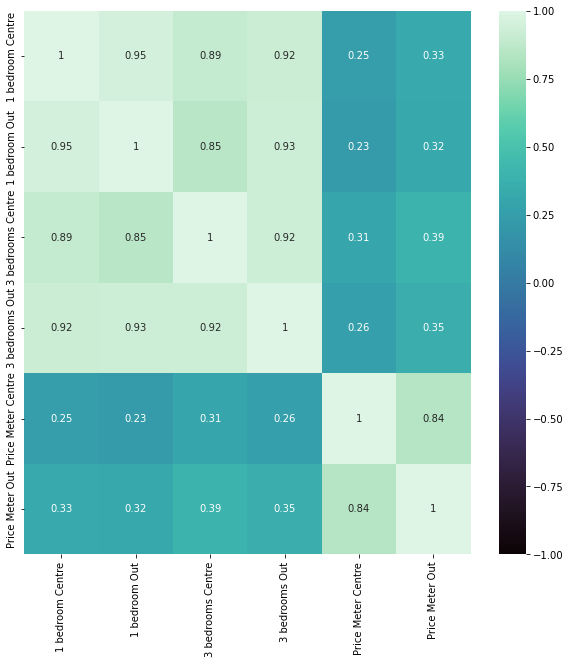

In [15]:
plt.figure(figsize = (10,10))

sns.heatmap(df2.corr(), 
            cmap = "mako", 
            annot = True, 
            vmin = -1, 
            vmax = 1 );


1.3.Sesgos de alguna de las variables numéricas del dataset.

In [32]:
skew_primaria = skew(df['Primary School'].notnull())
print(f"El valor del sesgo para la variable 'Primary School' es: {skew_primaria}")

El valor del sesgo para la variable 'Primary School' es: -0.6882575991738676


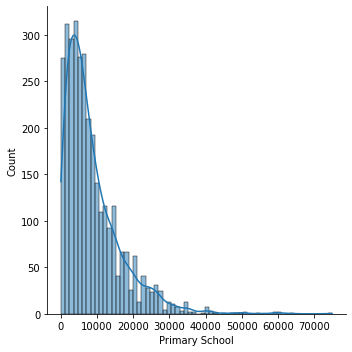

In [33]:
sns.displot(df["Primary School"], kde= True)

Como no nos sale el valor correcto ni aun usando notnull() vamos a hacer una copia del df para hacer un dropna y usar esos datos

In [34]:
copia_df = df.copy()

In [35]:
copia_df.dropna(inplace= True)

In [36]:
copia_df.shape

(1264, 58)

In [37]:
#Calculamos el sesgo
skew_primaria2 = skew(copia_df['Primary School'])
skew_primaria2


1.9742425457164132

Nos sale positivo por lo que podemos decir que los datos estan sesgados a la derecha

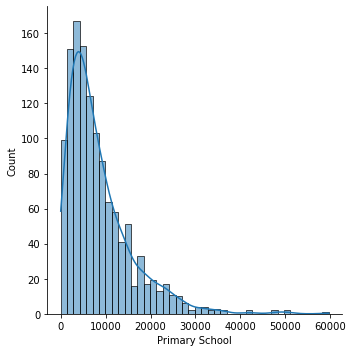

In [39]:
sns.displot(copia_df["Primary School"], kde= True)

Como vemos en el histograma la cola de la derecha es mucho mas grande que la de la izquierda

1.4. Intervalo de confianza de algunas de las variables numéricas del dataset

Para este ejercicios trabajaremos con la copia del DF que no tiene nulos para que los valores sean correctos

In [48]:
datos = copia_df['Imported Beer']


print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))

print(np.mean(datos))

(2.197564012368885, 2.3209486458589628)
2.259256329113924


Con un 95% de probabilidades podemos decir que el precio de la cerveza de importacion esta entre 2.19$ y 2.32$ en el supermercado. Con un precio de media de 2.25$

In [49]:
datos = copia_df['Primary School']


print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))

print(np.mean(datos))

(8067.1853288801785, 8870.494196436277)
8468.839762658228


El precio de la escuela primaria, con un 95% de probabilidad estaria entre 8067.18$ y 8870.49$ Siendo el precio medio 8468.83$